In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **READING THE DATA**

In [80]:
df=pd.read_csv("../input/mobile-price-classification/train.csv")

In [13]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**CHECKING FOR NULL VALUES**

In [15]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

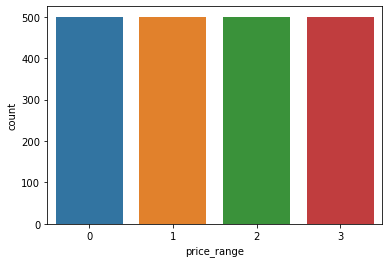

In [17]:
sns.countplot(df['price_range'])

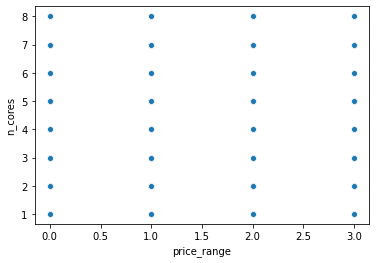

In [20]:
sns.scatterplot(x=df['price_range'],y=df['n_cores'],data=df)

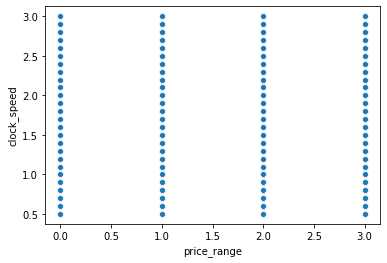

In [21]:
sns.scatterplot(x=df['price_range'],y=df['clock_speed'],data=df)

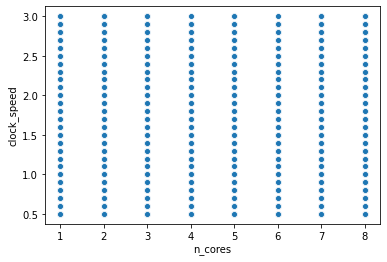

In [22]:
sns.scatterplot(x=df['n_cores'],y=df['clock_speed'],data=df)

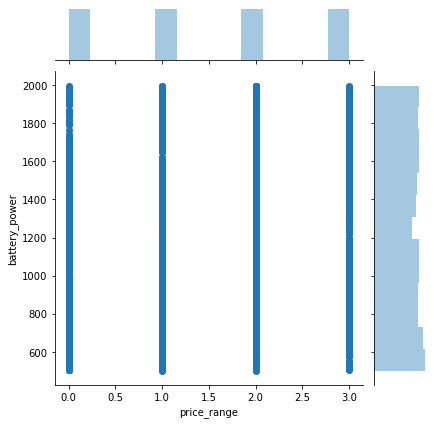

In [23]:
sns.jointplot(x=df['price_range'],y=df['battery_power'])

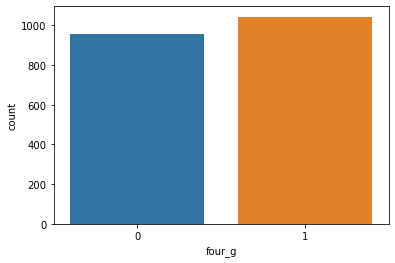

In [25]:
sns.countplot(df['four_g'])

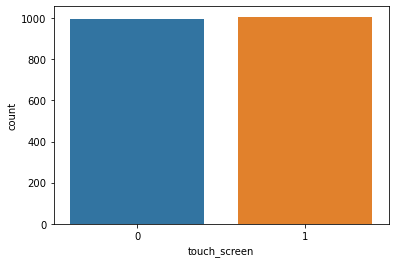

In [27]:
sns.countplot(df['touch_screen'])

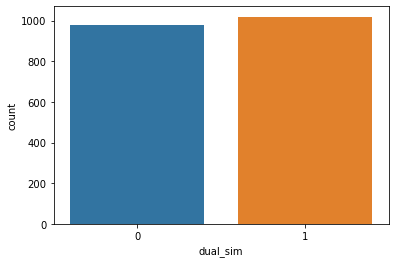

In [28]:
sns.countplot(df['dual_sim'])

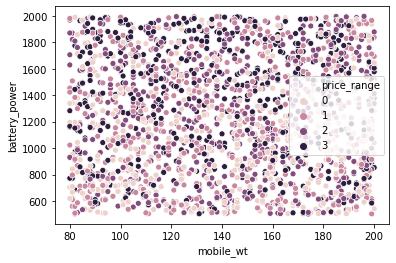

In [39]:
sns.scatterplot(x=df['mobile_wt'],y=df['battery_power'],hue=df['price_range'],data=df)

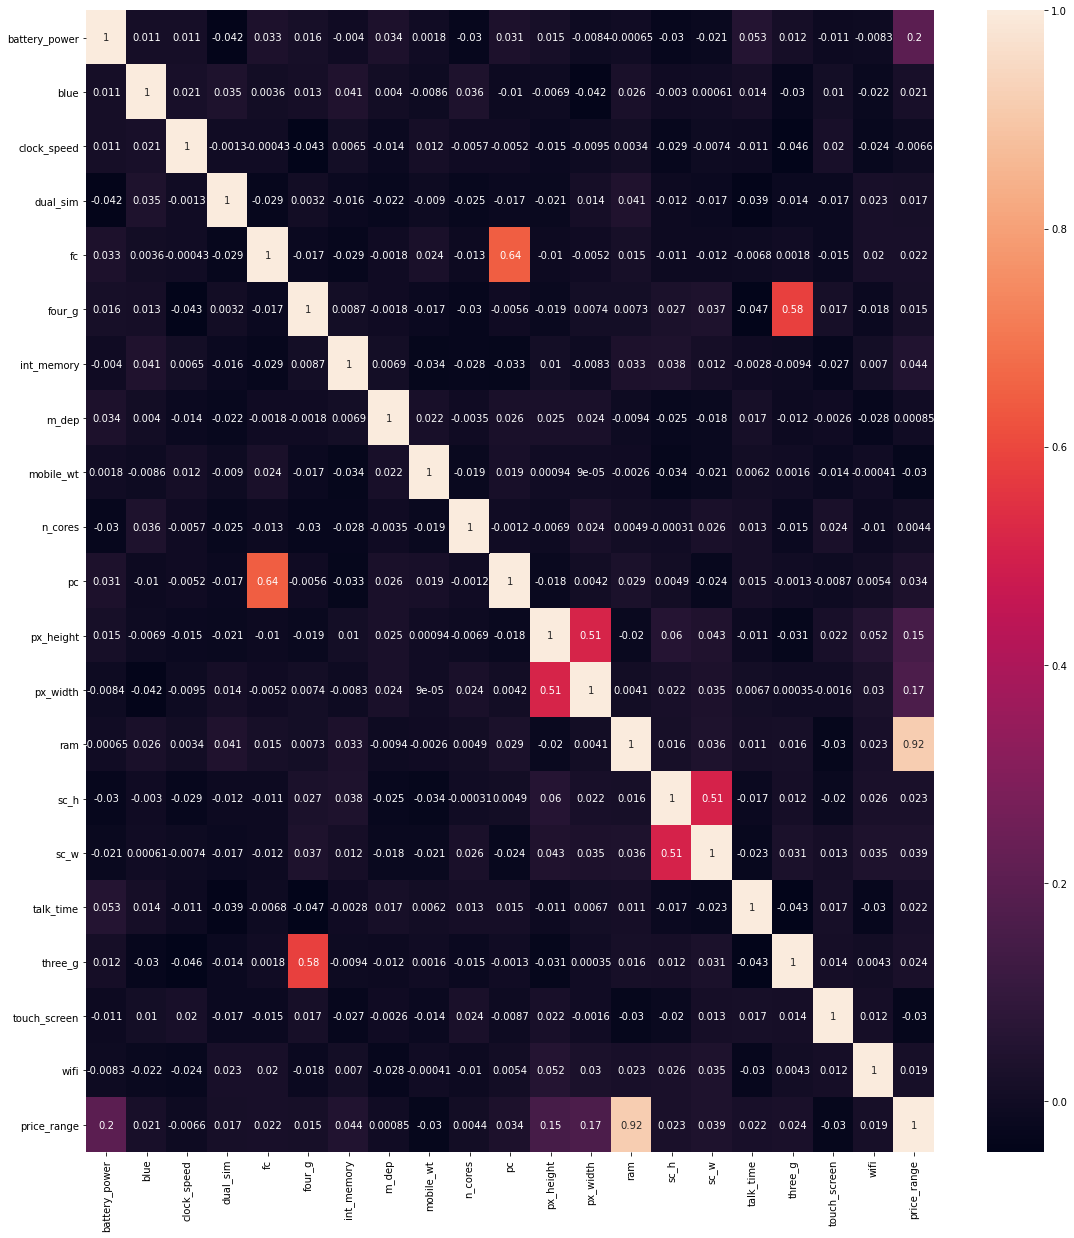

In [49]:
fig, ax = plt.subplots(figsize=(19,21))
sns.heatmap(df.corr(),annot=True,ax=ax)

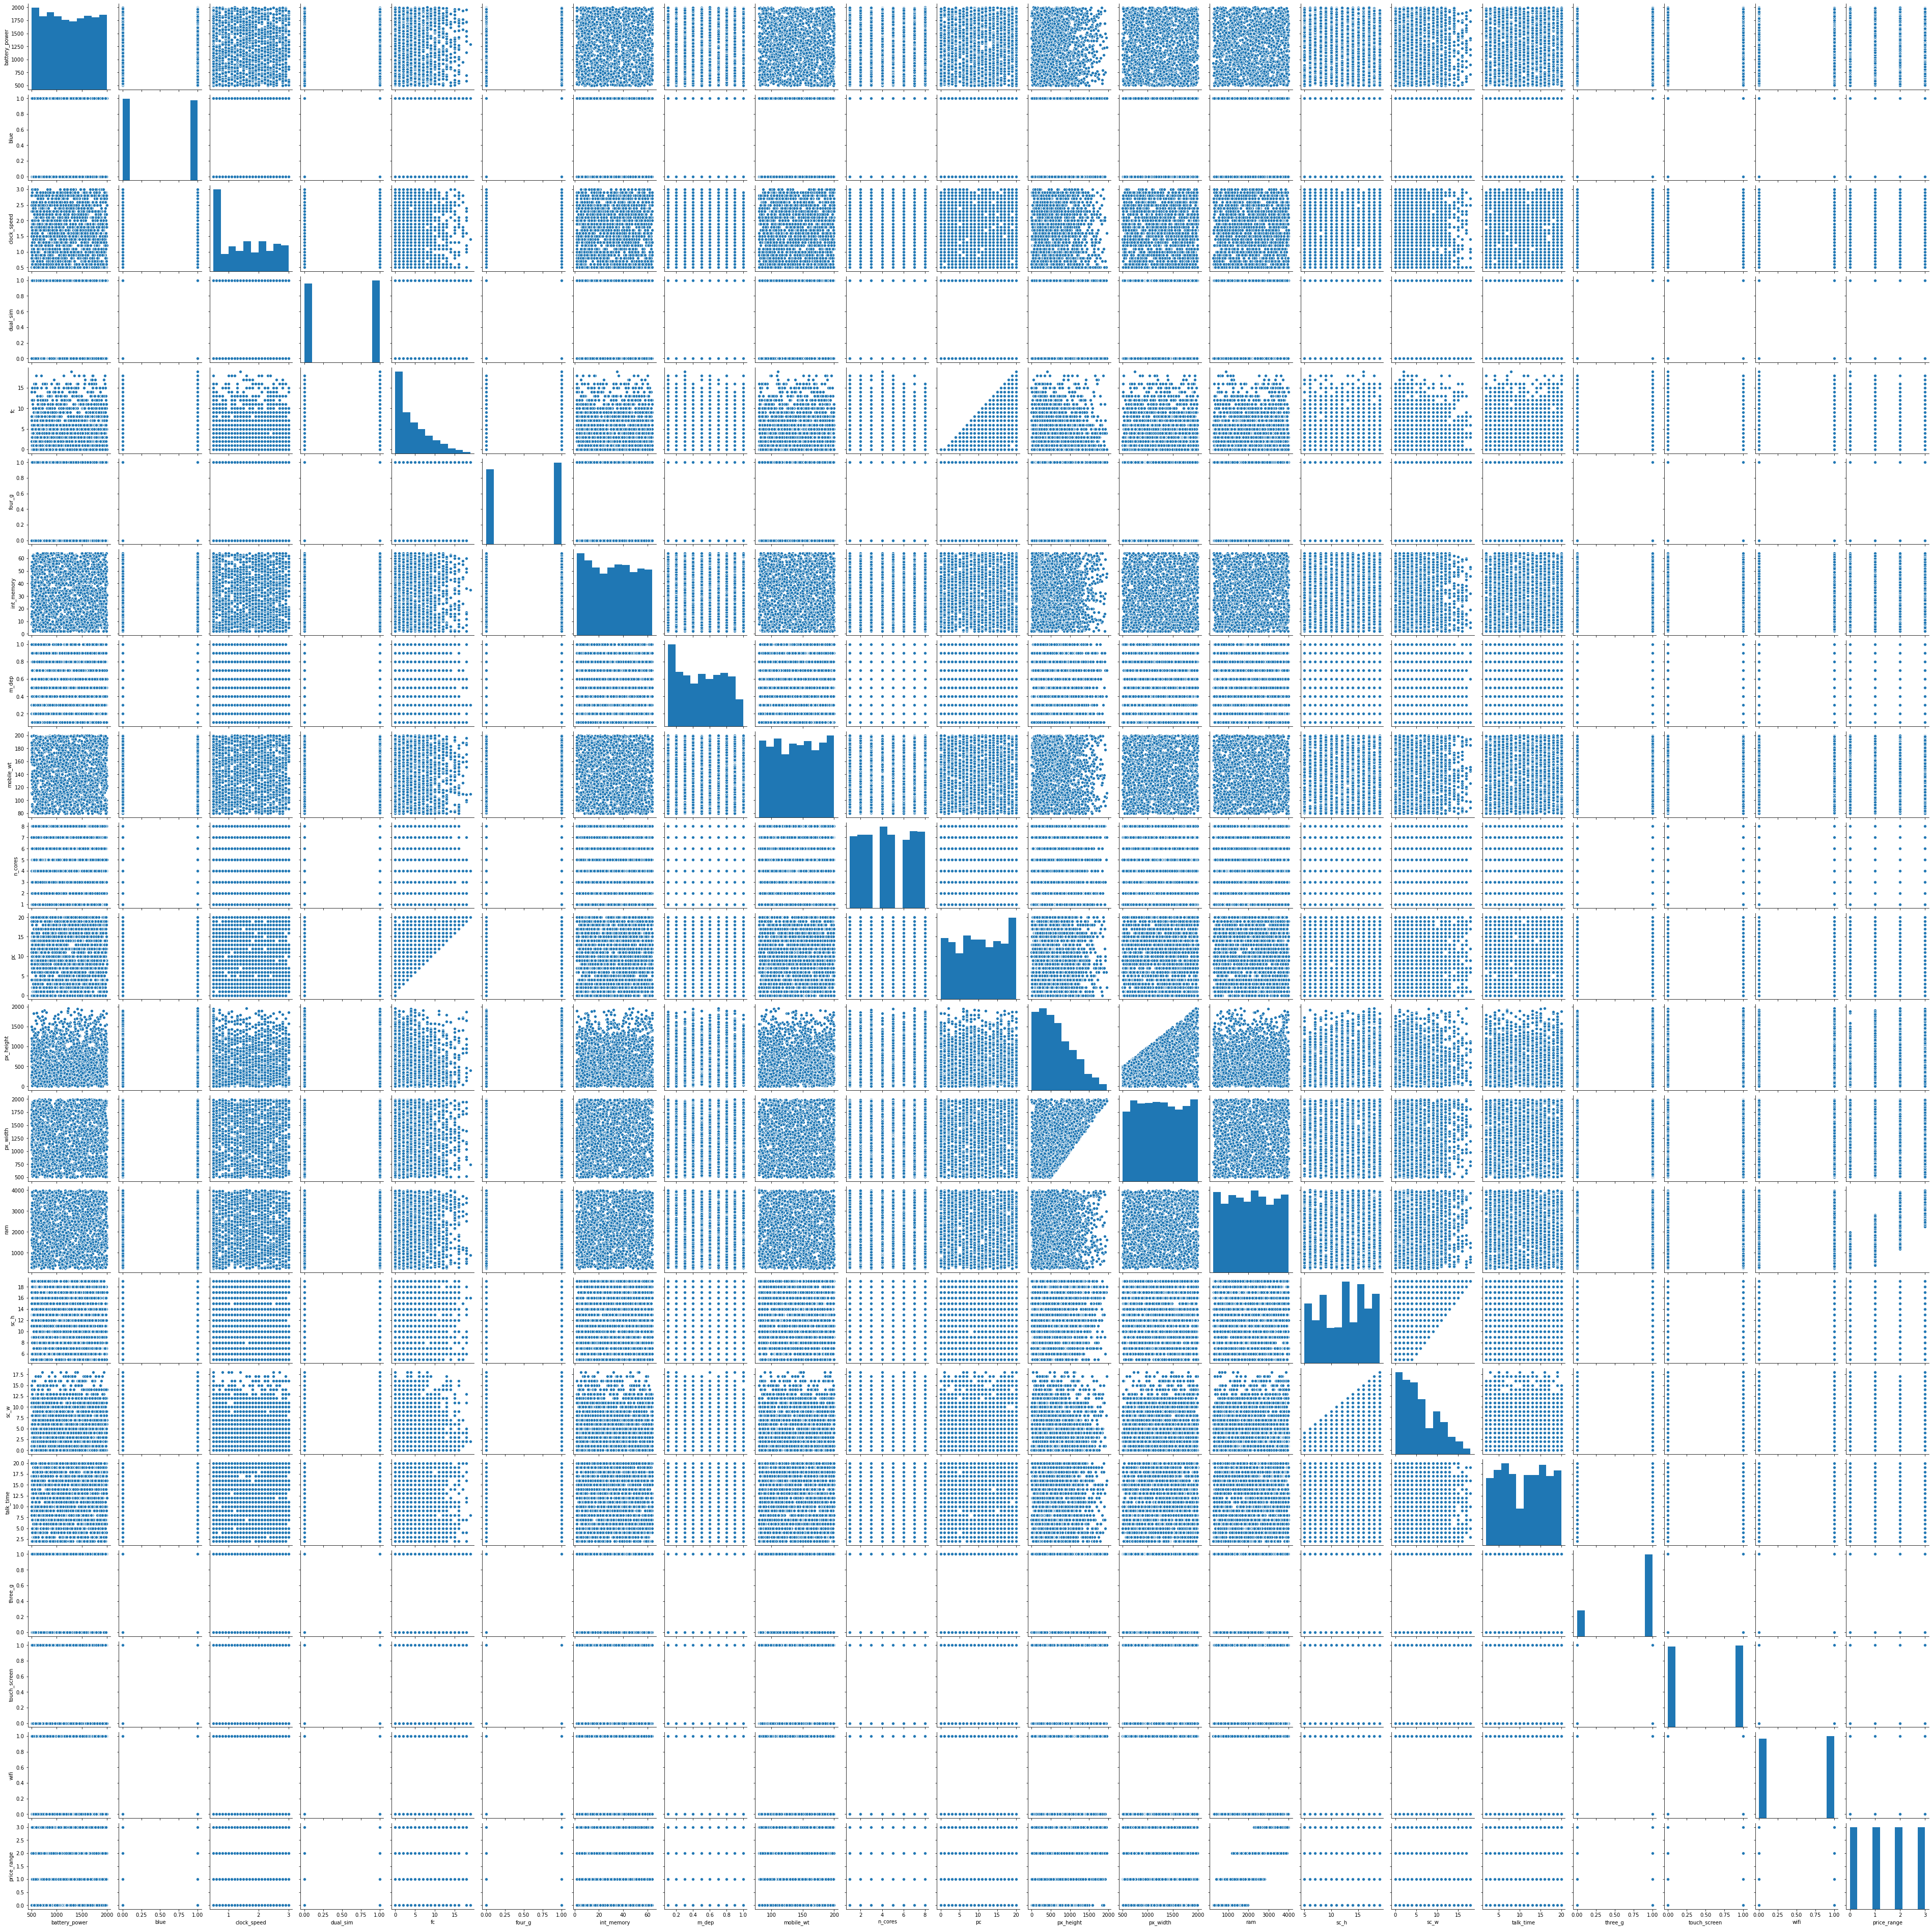

In [50]:
sns.pairplot(df)

In [61]:
from sklearn.model_selection import train_test_split

In [81]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn=KNeighborsClassifier(n_neighbors=4)

In [85]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [86]:
predictions=knn.predict(x_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[142   2   0   0]
 [ 10 129   2   0]
 [  0  20 155   3]
 [  0   0  16 121]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       144
           1       0.85      0.91      0.88       141
           2       0.90      0.87      0.88       178
           3       0.98      0.88      0.93       137

    accuracy                           0.91       600
   macro avg       0.92      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



# HYPER-PARAMETR TUNING USING GRIDSEARCH CV


In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [94]:
grid = GridSearchCV(knn, param_grid,verbose=3, scoring='accuracy')

In [95]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.886, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.868, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.900, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.900, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.925, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.896, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.864, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.900, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.911, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.889, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.918, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.900, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.925, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .

[CV] ...................... n_neighbors=14, score=0.961, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.932, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.911, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.936, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.907, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.943, total=   0.0s
[CV] n_neighbors=16 ..................................................
[CV] ...................... n_neighbors=16, score=0.939, total=   0.0s
[CV] n_neighbors=16 ..................................................
[CV] .

[CV] ...................... n_neighbors=27, score=0.918, total=   0.0s
[CV] n_neighbors=27 ..................................................
[CV] ...................... n_neighbors=27, score=0.921, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ...................... n_neighbors=28, score=0.932, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ...................... n_neighbors=28, score=0.907, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ...................... n_neighbors=28, score=0.929, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ...................... n_neighbors=28, score=0.907, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ...................... n_neighbors=28, score=0.921, total=   0.0s
[CV] n_neighbors=29 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [96]:
grid.best_params_

{'n_neighbors': 13}

In [97]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [98]:
grid_predictions=grid.predict(x_test)

In [99]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[141   3   0   0]
 [  5 133   3   0]
 [  0  15 157   6]
 [  0   0  11 126]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       144
           1       0.88      0.94      0.91       141
           2       0.92      0.88      0.90       178
           3       0.95      0.92      0.94       137

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

